# Hands On with Simple Linear Regression
## Goal for practice
### 1. Performan simple linear regression with SKlearn
### 2. Use model performance KPIs to evaluate model performance
### 3. Perform residule diagnostic and decide proper treatment before fit the model
### 4. Implement SLR with gradient descent algorithm

We have learnt Simple(SLR) Linear Regression, let's use some data to do some hands on work. The data provided is a synthesized data let's fit model with sklearn

#### Load important library

In [1]:
import pandas as pd  
import numpy as np  
import os
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
%matplotlib inline

In [3]:
path=""
data1b = "train.csv"
data1t = "test.csv"
data2b = "train2.csv"
data2t = "test2.csv"
data3b = "train3.csv"
data3t = "test3.csv"
#print(os.path.join(path, data1b))

# Read Data

In [4]:
dt1b = pd.read_csv(os.path.join(path, data1b))
dt1t = pd.read_csv(os.path.join(path, data1t))
dt2b = pd.read_csv(os.path.join(path, data2b))
dt2t = pd.read_csv(os.path.join(path, data2t))
dt3b = pd.read_csv(os.path.join(path, data3b))
dt3t = pd.read_csv(os.path.join(path, data3t))

# Practice 1 - Use "train.csv" and "test.csv" build simple linear model 

### Check data quality and scatter plot
#### 1 - head
#### 2 - check null
#### 3 - scatter plot
#### 4 - Train model with model evaluation
#### 5 - check residual plot and diagnostics

In [5]:
print("Train data size: {}".format(dt1b.shape))
print("Test data size: {}".format(dt1t.shape))

Train data size: (700, 2)
Test data size: (300, 2)


In [6]:
dt1b.head()

x          y
0  24.0  21.549452
1  50.0  47.464463
2  15.0  17.218656
3  38.0  36.586398
4  87.0  87.288984

In [7]:
dt1t.head()

x          y
0  77  79.775152
1  21  23.177279
2  22  25.609262
3  20  17.857388
4  36  41.849864

In [8]:
dt1b.describe()

x           y
count   700.000000  699.000000
mean     54.985939   49.939869
std     134.681703   29.109217
min       0.000000   -3.839981
25%      25.000000   24.929968
50%      49.000000   48.973020
75%      75.000000   74.929911
max    3530.157369  108.871618

In [9]:
dt1t.describe()

x           y
count  300.000000  300.000000
mean    50.936667   51.205051
std     28.504286   29.071481
min      0.000000   -3.467884
25%     27.000000   25.676502
50%     53.000000   52.170557
75%     73.000000   74.303007
max    100.000000  105.591837

In [10]:
print("Train data misscnt: {}".format(dt1b.isnull().sum()))
print("Test data misscnt: {}".format(dt1t.isnull().sum()))

Train data misscnt: x    0
y    1
dtype: int64
Test data misscnt: x    0
y    0
dtype: int64


Noticed train data has a missing value in target , we have to remove the missing value before fit model, 
otherwise you will get error message. Dropna and double check the missing row was removed

In [11]:
dt1b = dt1b.dropna().copy()
print("Train data size: {}".format(dt1b.shape))
print("Test data size: {}".format(dt1t.shape))

Train data size: (699, 2)
Test data size: (300, 2)


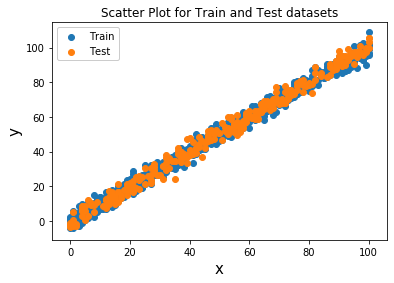

In [26]:
plt.scatter((dt1b['x']),dt1b['y'], label="Train")
plt.title("Scatter Plot for Train and Test datasets")
plt.xlabel("x", fontsize=15)
plt.ylabel("y", fontsize=15)

plt.scatter((dt1t['x']),dt1t['y'], label="Test")

plt.legend(framealpha=1, frameon=True)

We retrieve the independent(x) and dependent(y) variables and since we have only one feature(x) 
we reshape them so that we could feed them into our linear regression model.

In [12]:
x_train = dt1b['x']
y_train = dt1b['y']
x_test = dt1t['x']
y_test = dt1t['y']

x_train = np.array(x_train)
y_train = np.array(y_train)
x_test = np.array(x_test)
y_test = np.array(y_test)

x_train = x_train.reshape(-1,1)#change 1 dimension to (xx,1)
x_test = x_test.reshape(-1,1)

Fit model and get the intercept and coefficent

In [13]:
reg = LinearRegression(normalize=True)
reg.fit(x_train,y_train)
y_pred = reg.predict(x_test)
print(r2_score(y_test,y_pred))#r-square低的话model不好
print(mean_squared_error(y_test,y_pred))

0.9888014444327563
9.432922192039296


In [14]:
print("intercept: {}".format(reg.intercept_))

intercept: -0.10726546430097983


In [15]:
print("coeffcient: {}".format(reg.coef_))

coeffcient: [1.00065638]


Therefore the fitted line : y = -0.10726546430095851 + 1.00065638*x

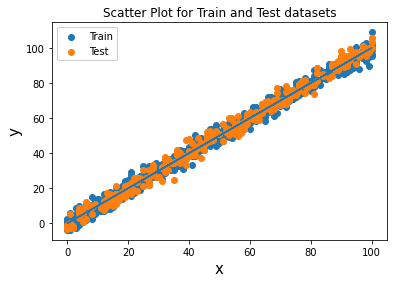

In [16]:
plt.scatter(dt1b['x'],dt1b['y'], label="Train")
plt.title("Scatter Plot for Train and Test datasets")
plt.xlabel("x", fontsize=15)
plt.ylabel("y", fontsize=15)

plt.scatter((dt1t['x']),dt1t['y'], label="Test")

plt.legend(framealpha=1, frameon=True)

plt.plot(dt1b['x'], (-0.10726546430095851 + 1.00065638*dt1b['x']))

How about build sample residual?

In [17]:
y_pred_b = reg.predict(x_train)
residuale = y_train - y_pred_b

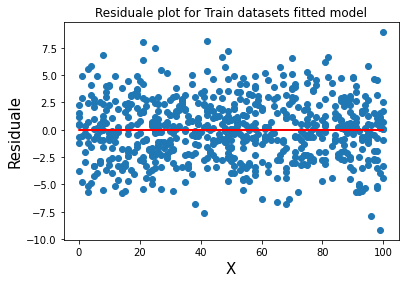

In [18]:
plt.scatter((dt1b['x']),residuale)
plt.title("Residuale plot for Train datasets fitted model")
plt.xlabel("X", fontsize=15)
plt.ylabel("Residuale", fontsize=15)
plt.plot(dt1b['x'], 0*dt1b['x'], color="r")

Residule distributed around zero randomly, the model fit is adequate 

# Practice 2 - Use "train2.csv" and "test2.csv" build simple linear model, did you observe any special trends? How to improve the model fit

Below code give a initial scripts to look into data, 
please take sometime following majority steps of practice 1 to tackle this problem 

In [66]:
print("Train data size: {}".format(dt2b.shape))
print("Test data size: {}".format(dt2t.shape))

Train data size: (699, 2)
Test data size: (300, 2)


In [67]:
dt2b.head()

x          y
0   576.0  21.549452
1  2500.0  47.464463
2   225.0  17.218656
3  1444.0  36.586398
4  7569.0  87.288984

In [68]:
dt2t.head()

x          y
0  5929  79.775152
1   441  23.177279
2   484  25.609262
3   400  17.857388
4  1296  41.849864

In [69]:
dt2b.describe()

x           y
count    699.000000  699.000000
mean    3338.597997   49.939869
std     3050.726682   29.109217
min        0.000000   -3.839981
25%      625.000000   24.929968
50%     2401.000000   48.973020
75%     5625.000000   74.929911
max    10000.000000  108.871618

In [70]:
dt2t.describe()

x           y
count    300.000000  300.000000
mean    3404.330000   51.205051
std     2996.644856   29.071481
min        0.000000   -3.467884
25%      729.000000   25.676502
50%     2809.000000   52.170557
75%     5329.000000   74.303007
max    10000.000000  105.591837

In [71]:
print("Train data misscnt: {}".format(dt2b.isnull().sum()))
print("Test data misscnt: {}".format(dt2t.isnull().sum()))

Train data misscnt: x    0
y    0
dtype: int64
Test data misscnt: x    0
y    0
dtype: int64


In [72]:
dt2b = dt2b.dropna().copy()
print("Train data size: {}".format(dt2b.shape))
print("Test data size: {}".format(dt2t.shape))

Train data size: (699, 2)
Test data size: (300, 2)


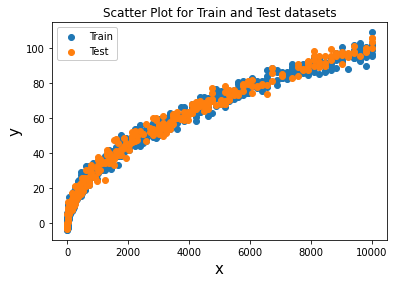

In [73]:
plt.scatter((dt2b['x']),dt2b['y'], label="Train")
plt.title("Scatter Plot for Train and Test datasets")
plt.xlabel("x", fontsize=15)
plt.ylabel("y", fontsize=15)

plt.scatter((dt2t['x']),dt2t['y'], label="Test")

plt.legend(framealpha=1, frameon=True)

* transform into linear relationship
* log,exp,square root...

### Take sqrt

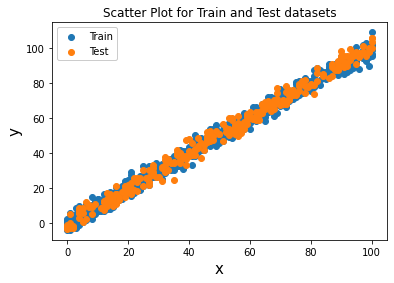

In [80]:
plt.scatter((np.sqrt(dt2b['x'])),dt2b['y'], label="Train")
plt.title("Scatter Plot for Train and Test datasets")
plt.xlabel("x", fontsize=15)
plt.ylabel("y", fontsize=15)

plt.scatter((np.sqrt(dt2t['x'])),dt2t['y'], label="Test")

plt.legend(framealpha=1, frameon=True)

In [81]:
x_train = np.sqrt(dt2b['x'])
y_train = dt2b['y']
x_test = np.sqrt(dt2t['x'])
y_test = dt2t['y']

x_train = np.array(x_train)
y_train = np.array(y_train)
x_test = np.array(x_test)
y_test = np.array(y_test)

x_train = x_train.reshape(-1,1)#change 1 dimension to (xx,1)
x_test = x_test.reshape(-1,1)

In [82]:
reg = LinearRegression(normalize=True)
reg.fit(x_train,y_train)
y_pred = reg.predict(x_test)
print(r2_score(y_test,y_pred))#r-square低的话model不好
print(mean_squared_error(y_test,y_pred))

0.9888014444327563
9.432922192039296


In [83]:
print("intercept: {}".format(reg.intercept_))

intercept: -0.10726546430097983


In [84]:
print("coeffcient: {}".format(reg.coef_))

coeffcient: [1.00065638]


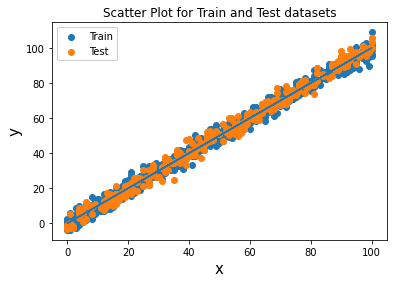

In [88]:
plt.scatter(np.sqrt(dt2b['x']),dt2b['y'], label="Train")
plt.title("Scatter Plot for Train and Test datasets")
plt.xlabel("x", fontsize=15)
plt.ylabel("y", fontsize=15)

plt.scatter(np.sqrt(dt2t['x']),dt2t['y'], label="Test")

plt.legend(framealpha=1, frameon=True)

plt.plot(np.sqrt(dt2b['x']), (-0.10726546430097983 + 1.00065638*np.sqrt(dt2b['x'])))

How about build sample residual?

In [89]:
y_pred_b = reg.predict(x_train)
residuale = y_train - y_pred_b

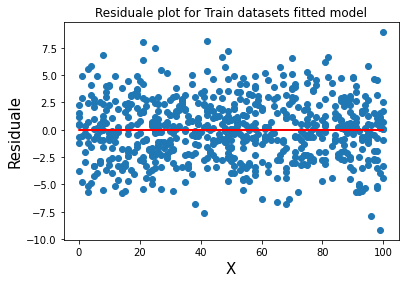

In [90]:
plt.scatter(np.sqrt(dt2b['x']),residuale)
plt.title("Residuale plot for Train datasets fitted model")
plt.xlabel("X", fontsize=15)
plt.ylabel("Residuale", fontsize=15)
plt.plot(np.sqrt(dt2b['x']), 0*dt2b['x'], color="r")

# Practice 3 - Use "train3.csv" and "test3.csv" build simple linear model, did you observe any special trends? How to improve the model fit

In [26]:
print("Train data size: {}".format(dt3b.shape))
print("Test data size: {}".format(dt3t.shape))

Train data size: (700, 2)
Test data size: (300, 2)


In [27]:
dt3b.head()

x            y
0  24.0   464.378880
1  50.0  2252.875253
2  15.0   296.482126
3  38.0  1338.564521
4  87.0  7619.366709

In [28]:
dt3t.head()

x            y
0  77  6364.074878
1  21   537.186256
2  22   655.834278
3  20   318.886311
4  36  1751.411149

In [29]:
dt3b.describe()

x             y
count   700.000000    699.000000
mean     54.985939   3340.124826
std     134.681703   3055.712556
min       0.000000      0.014850
25%      25.000000    621.515765
50%      49.000000   2398.356724
75%      75.000000   5614.501316
max    3530.157369  11853.029271

In [30]:
dt3t.describe()

x             y
count  300.000000    300.000000
mean    50.936667   3464.291087
std     28.504286   3082.356336
min      0.000000      0.075794
25%     27.000000    659.283348
50%     53.000000   2721.780348
75%     73.000000   5520.944197
max    100.000000  11149.636147

In [25]:
print("Train data misscnt: {}".format(dt3b.isnull().sum()))
print("Test data misscnt: {}".format(dt3t.isnull().sum()))

Train data misscnt: x    0
y    1
dtype: int64
Test data misscnt: x    0
y    0
dtype: int64


In [38]:
dt3b = dt3b.dropna().copy()
print("Train data size: {}".format(dt3b.shape))
print("Test data size: {}".format(dt3t.shape))

Train data size: (699, 2)
Test data size: (300, 2)


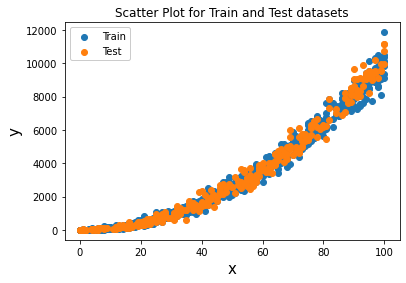

In [39]:
plt.scatter((dt3b['x']),dt3b['y'], label="Train")
plt.title("Scatter Plot for Train and Test datasets")
plt.xlabel("x", fontsize=15)
plt.ylabel("y", fontsize=15)

plt.scatter((dt3t['x']),dt3t['y'], label="Test")

plt.legend(framealpha=1, frameon=True)

### Take square

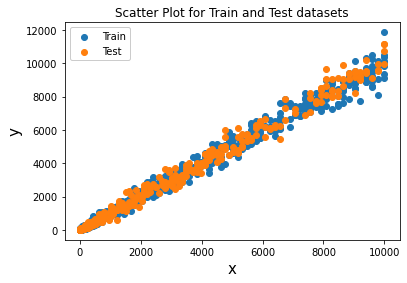

In [58]:
plt.scatter(np.square(dt3b['x']),dt3b['y'], label="Train")
plt.title("Scatter Plot for Train and Test datasets")
plt.xlabel("x", fontsize=15)
plt.ylabel("y", fontsize=15)

plt.scatter(np.square(dt3t['x']),dt3t['y'], label="Test")

plt.legend(framealpha=1, frameon=True)

In [91]:
x_train = np.square(dt3b['x'])
y_train = dt3b['y']
x_test = np.square(dt3t['x'])
y_test = dt3t['y']

x_train = np.array(x_train)
y_train = np.array(y_train)
x_test = np.array(x_test)
y_test = np.array(y_test)

x_train = x_train.reshape(-1,1)#change 1 dimension to (xx,1)
x_test = x_test.reshape(-1,1)

In [92]:
reg = LinearRegression(normalize=True)
reg.fit(x_train,y_train)
y_pred = reg.predict(x_test)
print(r2_score(y_test,y_pred))#r-square低的话model不好
print(mean_squared_error(y_test,y_pred))

0.9868221932280309
124783.95796242192


In [93]:
print("intercept: {}".format(reg.intercept_))

intercept: 15.653065793340375


In [94]:
print("coeffcient: {}".format(reg.coef_))

coeffcient: [0.99576881]


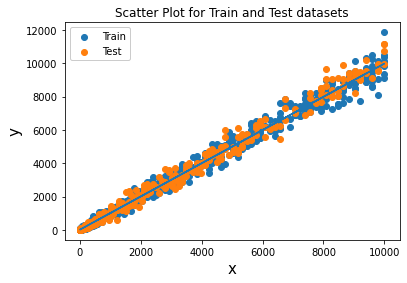

In [95]:
plt.scatter(np.square(dt3b['x']),dt3b['y'], label="Train")
plt.title("Scatter Plot for Train and Test datasets")
plt.xlabel("x", fontsize=15)
plt.ylabel("y", fontsize=15)

plt.scatter(np.square(dt3t['x']),dt3t['y'], label="Test")

plt.legend(framealpha=1, frameon=True)

plt.plot(np.square(dt3b['x']), (15.653065793340375 + 0.99576881*np.square(dt3b['x'])))

How about build sample residual?

In [96]:
y_pred_b = reg.predict(x_train)
residuale = y_train - y_pred_b

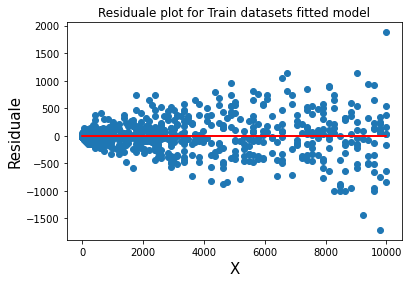

In [97]:
plt.scatter(np.square(dt3b['x']),residuale)
plt.title("Residuale plot for Train datasets fitted model")
plt.xlabel("X", fontsize=15)
plt.ylabel("Residuale", fontsize=15)
plt.plot(np.square(dt3b['x']), 0*dt3b['x'], color="r")

# Practice 4 - Can you implement simple linear regression model in practice1 from scratch using gradient descent?
# This is your homework

In [98]:
print("Train data size: {}".format(dt1b.shape))
print("Test data size: {}".format(dt1t.shape))

Train data size: (699, 2)
Test data size: (300, 2)


In [99]:
x_train = dt1b['x']
y_train = dt1b['y']
x_test = dt1t['x']
y_test = dt1t['y']

x_train = np.array(x_train).reshape(699,1)
y_train = np.array(y_train).reshape(699,1)
x_test = np.array(x_test).reshape(300,1)
y_test = np.array(y_test).reshape(300,1)

### Train steps:
#### 0 - Initiate parameters
#### 1 - Calculate prediction based on temp parameters and equation 
#### 2 - Calc. cost
#### 3 - Calc. Gradient
#### 4 - Update Parameter
#### 5 - loop 1-4 to reach min cost
#### 6 - earlier stop to end loop if minimal alrrady reached

### Building block functions (Only put two you need to finish the rest)

In [174]:
def get_pred(x_train, parameters):
    b1 = parameters['b1']
    b0 = parameters['b0']
    predictions = np.multiply(b1, x_train) + b0
    return predictions

def cost_function(predictions, y_train):
    cost = np.mean((y_train - predictions) ** 2) * 0.5
    return cost

def deriv(x_train, y_train, predictions):
    #### Please put you code here######
    derivatives=dict()
    derivatives['b0']=2*(predictions-y_train).transpose().dot(np.ones((699,1)))/len(y_train)
    derivatives['b1']=x_train.transpose().dot(2*(predictions-y_train))/len(y_train)
    return derivatives#gradient

def update_parameters(parameters, derivatives, learning_rate):
    #### Please put you code here######
    parameters["b0"]-=learning_rate*derivatives['b0']/len(y_train)
    parameters["b1"]-=learning_rate*derivatives['b1']/len(y_train)
    return parameters

### Build training function

In [178]:
def train(x_train, y_train, learning_rate, iters = 5):
    #random parameters
    parameters = dict()
    parameters["b1"] = np.random.uniform(0,1) * -1
    parameters["b0"] = np.random.uniform(0,1) * -1
    
    plt.figure()
    
    #loss
    loss = list()
    
    #iterate
    for i in range(iters):
        
        #Prediction
        #### PLease put you code here######
        predictions=get_pred(x_train, parameters)
        #cost function
        #### PLease put you code here######
        cost=cost_function(predictions, y_train)
        #append loss and print
        loss.append(cost)
        print("Iteration = {}, Loss = {}".format(i+1, cost))
        
        #plot function
        plt.plot(x_train, y_train, 'x')
        plt.plot(x_train, predictions, 'o')
        plt.show()
        
        #Calc. gradient/derivatives
        #### PLease put you code here######
        derivatives=deriv(x_train, y_train, predictions)
        #update parameters
        #### PLease put you code here######
        parameters=update_parameters(parameters, derivatives, learning_rate)
    
    return parameters, loss

### Traing model with your function by gradient descent algrithm

Iteration = 1, Loss = 4246.3224482969235


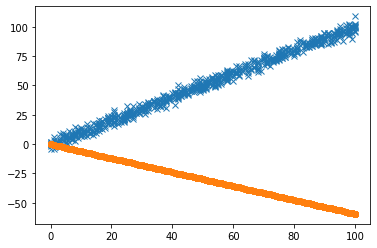

Iteration = 2, Loss = 3474.3617956616827


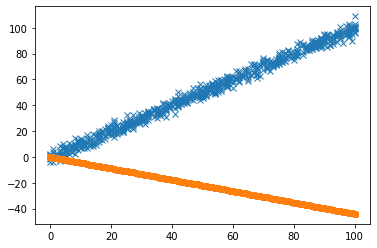

Iteration = 3, Loss = 2842.869973141424


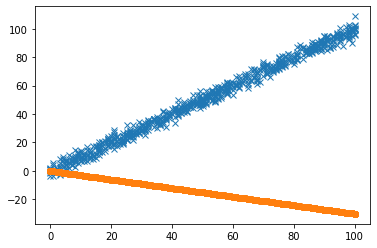

Iteration = 4, Loss = 2326.286750215587


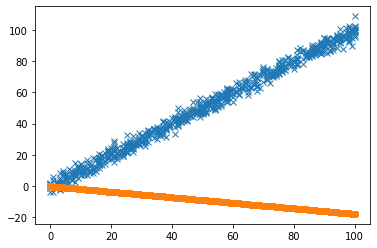

Iteration = 5, Loss = 1903.702930929281


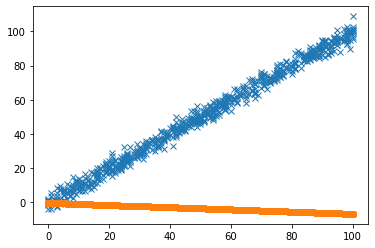

Iteration = 6, Loss = 1558.0140343534981


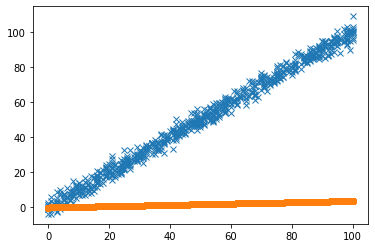

Iteration = 7, Loss = 1275.2279744949767


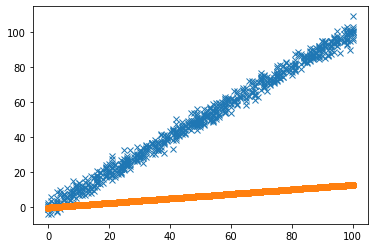

Iteration = 8, Loss = 1043.8987173433652


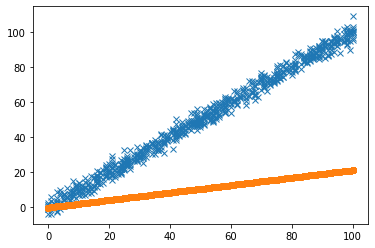

Iteration = 9, Loss = 854.6629917874628


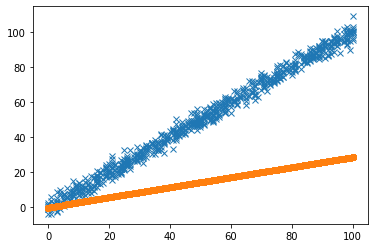

Iteration = 10, Loss = 699.861302335422


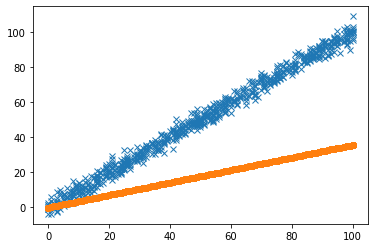

Iteration = 11, Loss = 573.2279037692638


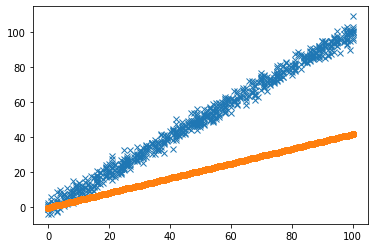

Iteration = 12, Loss = 469.6371891637787


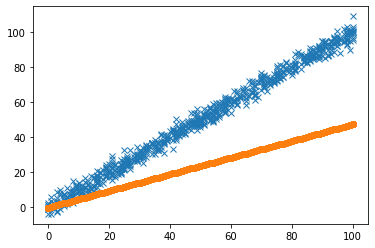

Iteration = 13, Loss = 384.8962260843115


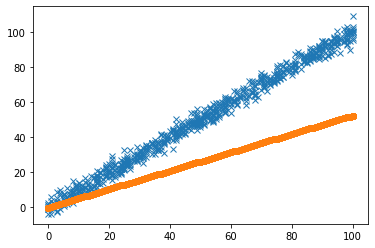

Iteration = 14, Loss = 315.5750436692411


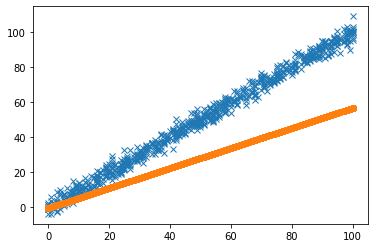

Iteration = 15, Loss = 258.8678013058438


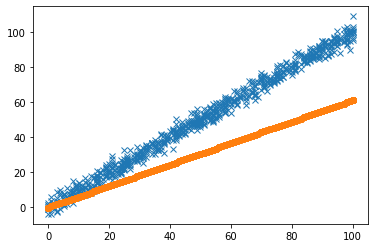

Iteration = 16, Loss = 212.47921956999784


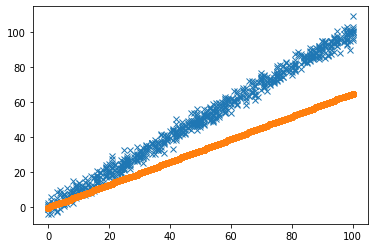

Iteration = 17, Loss = 174.53167661429612


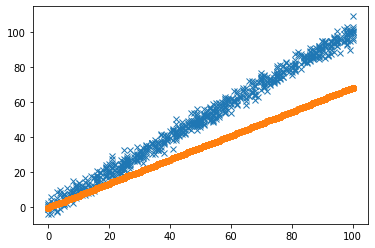

Iteration = 18, Loss = 143.4892096427441


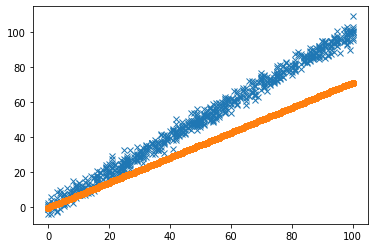

Iteration = 19, Loss = 118.09534535964758


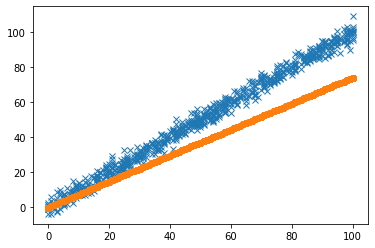

Iteration = 20, Loss = 97.32224302113637


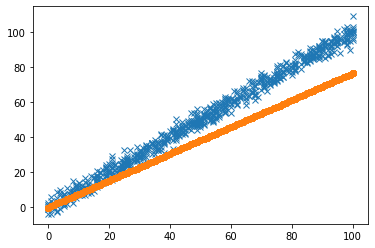

Iteration = 21, Loss = 80.32909160609236


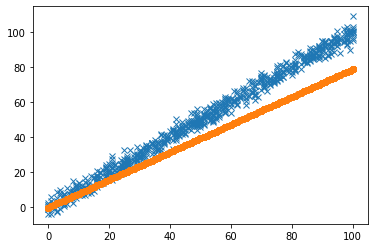

Iteration = 22, Loss = 66.42807719251498


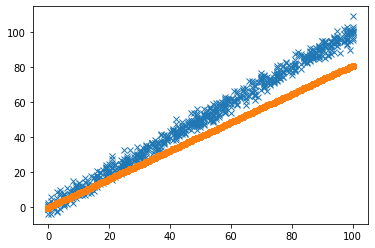

Iteration = 23, Loss = 55.056543036598804


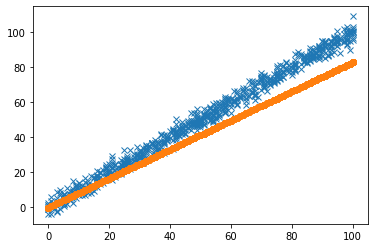

Iteration = 24, Loss = 45.75421550731765


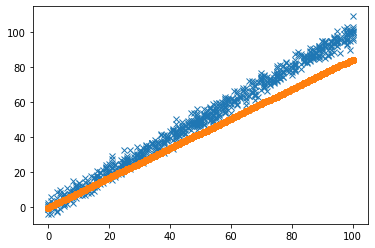

Iteration = 25, Loss = 38.14457407461394


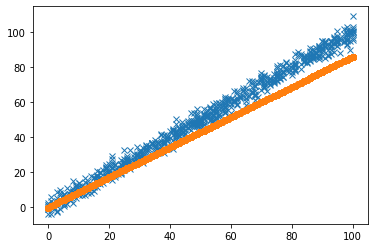

Iteration = 26, Loss = 31.919611283794374


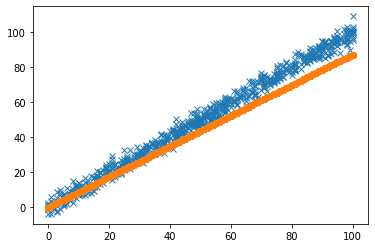

Iteration = 27, Loss = 26.827365861639276


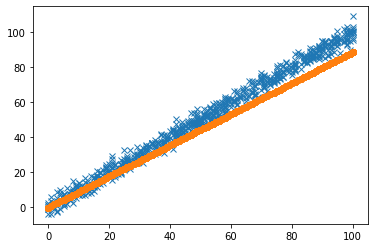

Iteration = 28, Loss = 22.66172434486988


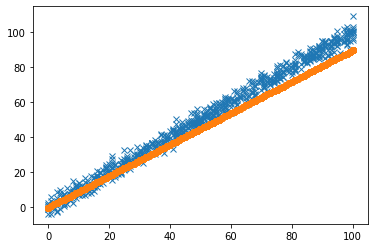

Iteration = 29, Loss = 19.254078442212517


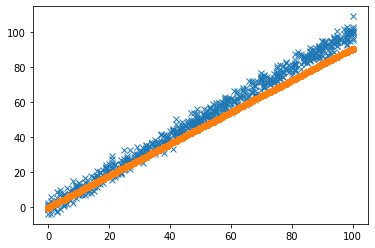

Iteration = 30, Loss = 16.466500453874907


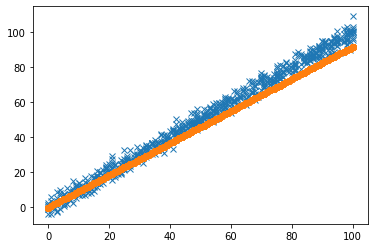

Iteration = 31, Loss = 14.186160517065106


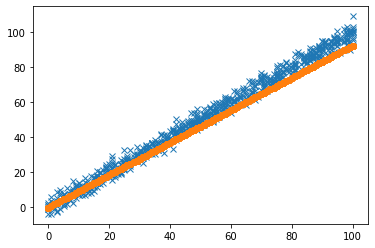

Iteration = 32, Loss = 12.320759710269826


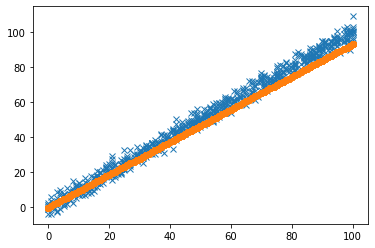

Iteration = 33, Loss = 10.794794166855532


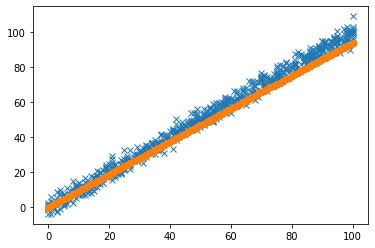

Iteration = 34, Loss = 9.54649898444698


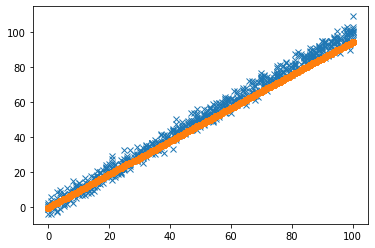

Iteration = 35, Loss = 8.52534823191609


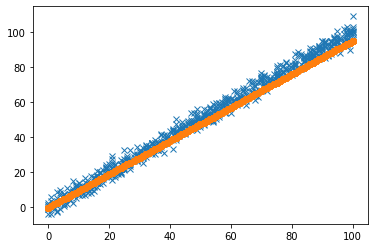

Iteration = 36, Loss = 7.690009864392973


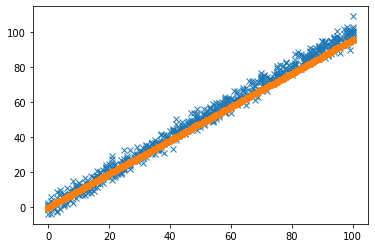

Iteration = 37, Loss = 7.006672769544183


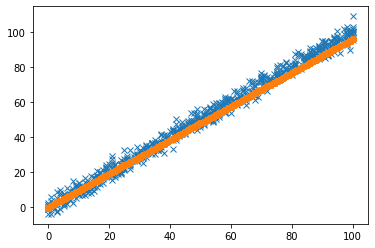

Iteration = 38, Loss = 6.447678230729207


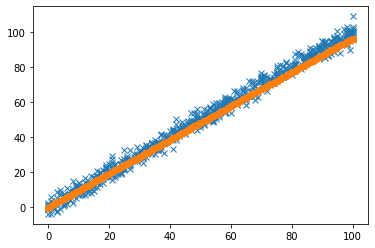

Iteration = 39, Loss = 5.990400414208751


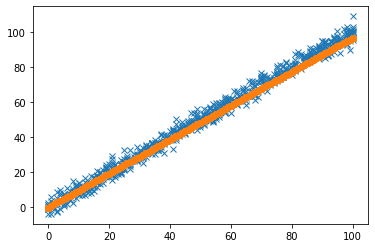

Iteration = 40, Loss = 5.61633056706226


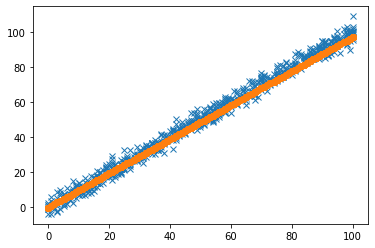

Iteration = 41, Loss = 5.3103278578568585


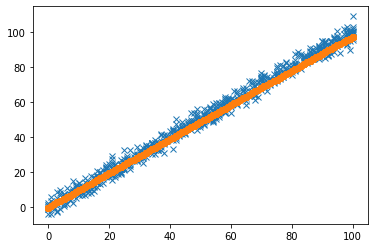

Iteration = 42, Loss = 5.060006537133232


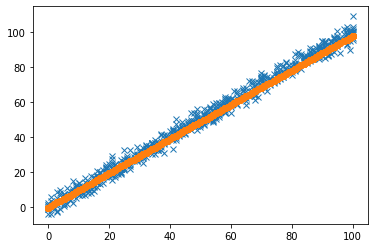

Iteration = 43, Loss = 4.855234612447751


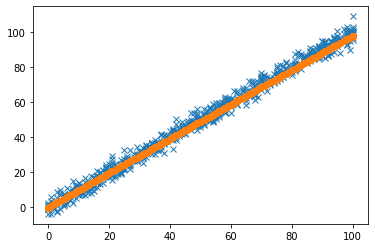

Iteration = 44, Loss = 4.6877237463674595


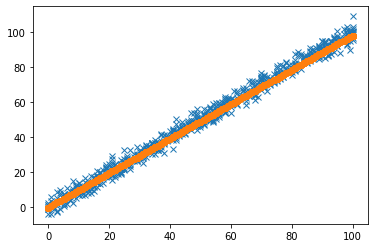

Iteration = 45, Loss = 4.550693778150607


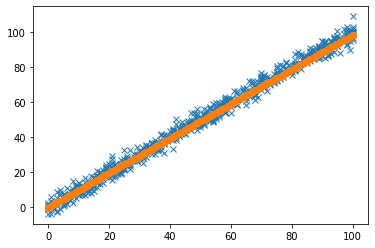

Iteration = 46, Loss = 4.438598290309269


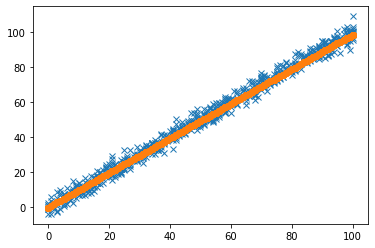

Iteration = 47, Loss = 4.346900112100426


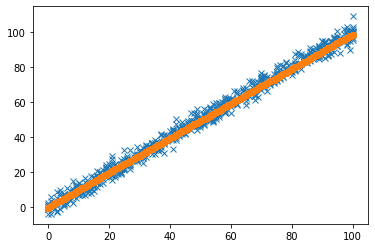

Iteration = 48, Loss = 4.271887673236368


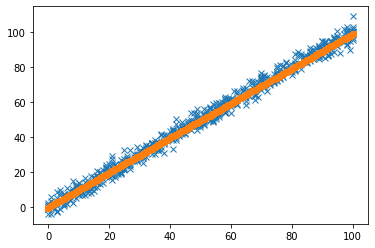

Iteration = 49, Loss = 4.210524774556734


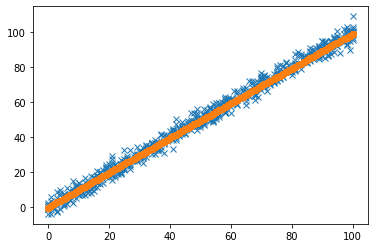

Iteration = 50, Loss = 4.160327694987422


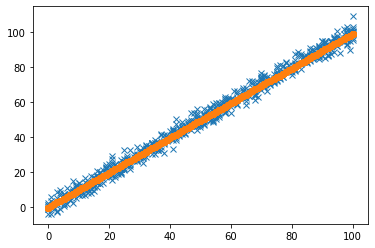

Iteration = 51, Loss = 4.119264660574221


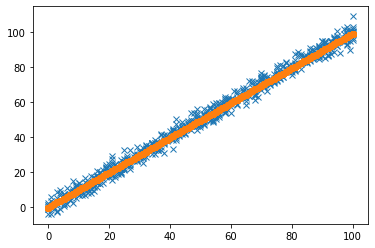

Iteration = 52, Loss = 4.085673606504751


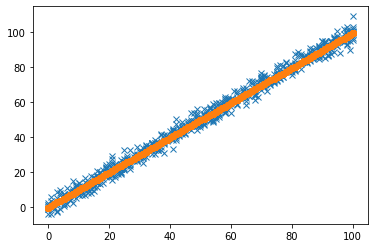

Iteration = 53, Loss = 4.058194903458601


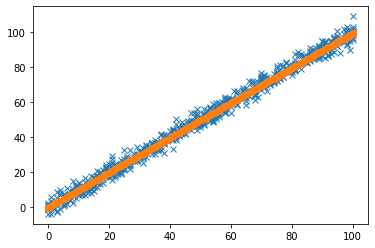

Iteration = 54, Loss = 4.035716325320942


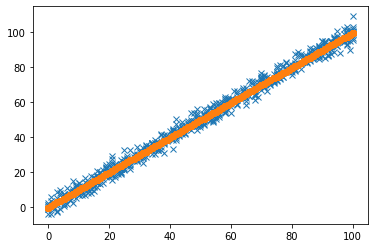

Iteration = 55, Loss = 4.017328030775484


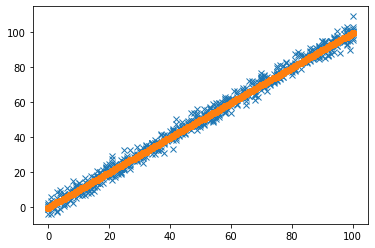

Iteration = 56, Loss = 4.002285736614196


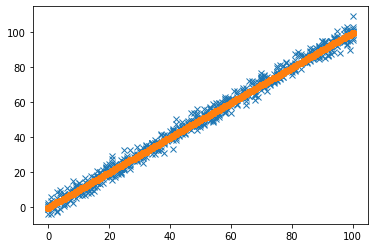

Iteration = 57, Loss = 3.9899805921684477


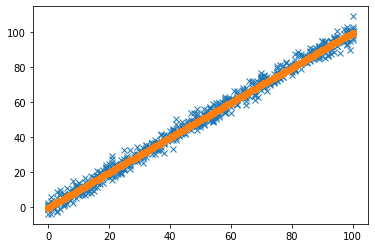

Iteration = 58, Loss = 3.9799145355006726


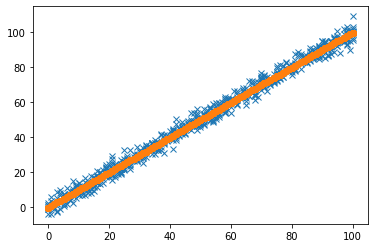

Iteration = 59, Loss = 3.9716801338750156


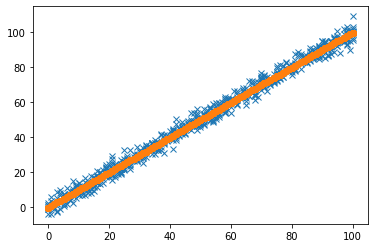

Iteration = 60, Loss = 3.9649440925308634


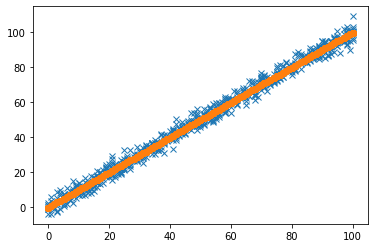

Iteration = 61, Loss = 3.959433764261268


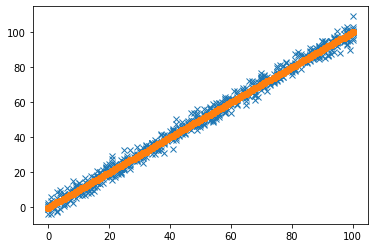

Iteration = 62, Loss = 3.954926113758626


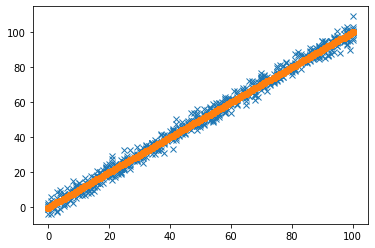

Iteration = 63, Loss = 3.951238690049038


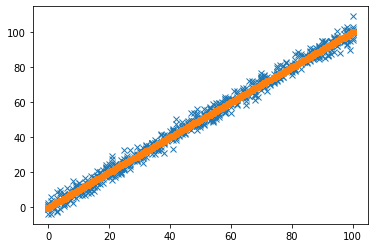

Iteration = 64, Loss = 3.948222241616075


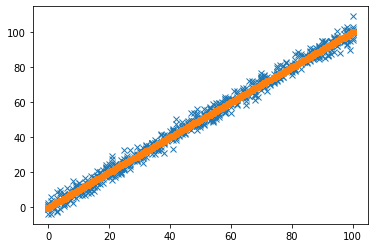

Iteration = 65, Loss = 3.945754675304082


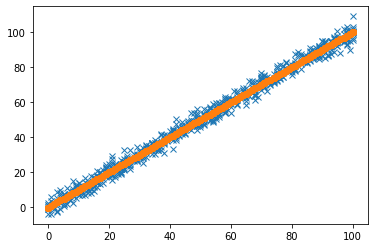

Iteration = 66, Loss = 3.943736114481887


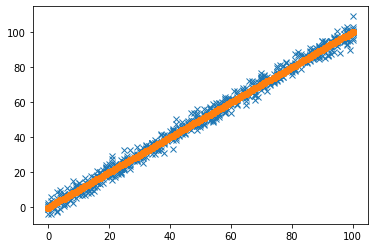

Iteration = 67, Loss = 3.942084856441418


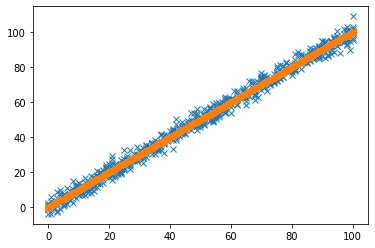

Iteration = 68, Loss = 3.9407340654030945


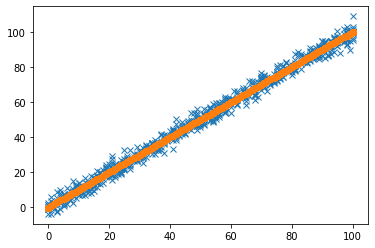

Iteration = 69, Loss = 3.939629067274249


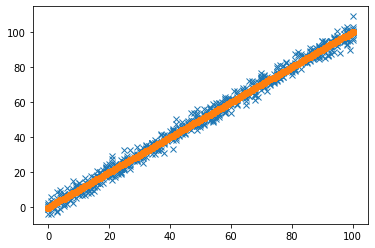

Iteration = 70, Loss = 3.9387251366633667


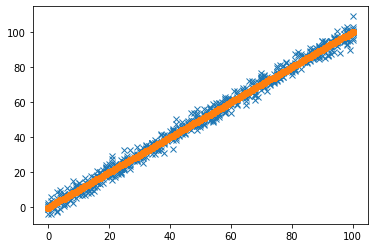

Iteration = 71, Loss = 3.937985686577439


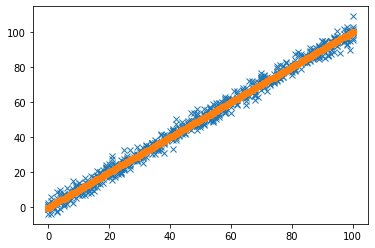

Iteration = 72, Loss = 3.9373807875287206


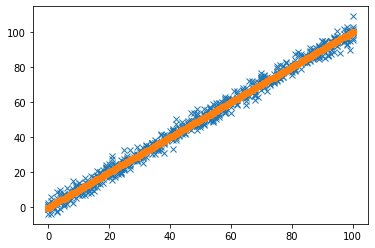

Iteration = 73, Loss = 3.9368859561103173


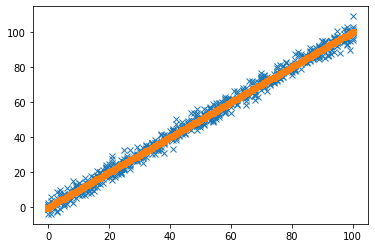

Iteration = 74, Loss = 3.9364811640070663


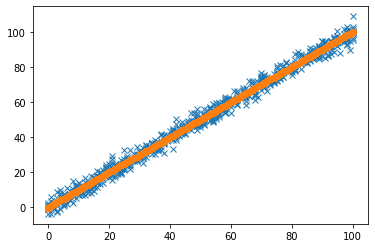

Iteration = 75, Loss = 3.936150027330494


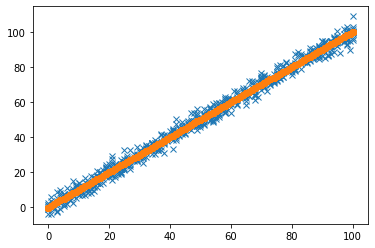

Iteration = 76, Loss = 3.9358791434653777


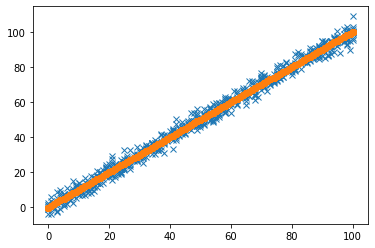

Iteration = 77, Loss = 3.9356575485861813


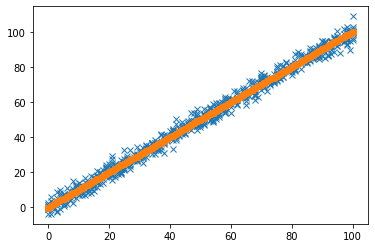

Iteration = 78, Loss = 3.9354762738858264


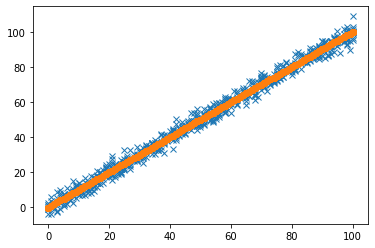

Iteration = 79, Loss = 3.9353279825547105


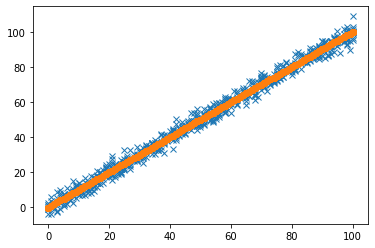

Iteration = 80, Loss = 3.935206672816379


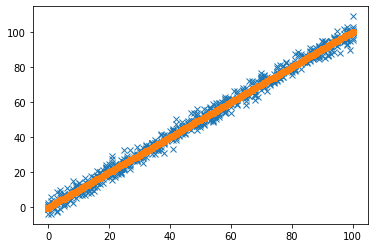

Iteration = 81, Loss = 3.9351074349999364


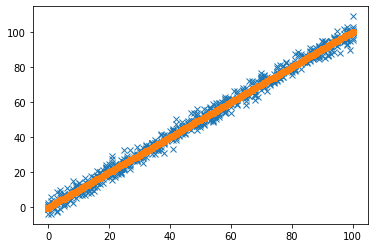

Iteration = 82, Loss = 3.9350262528164506


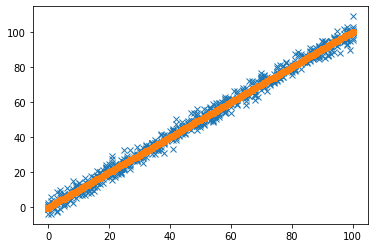

Iteration = 83, Loss = 3.9349598407958575


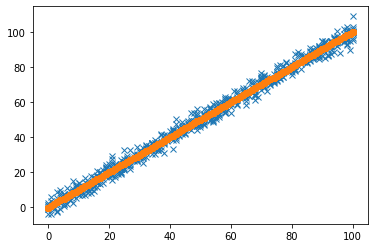

Iteration = 84, Loss = 3.9349055113044398


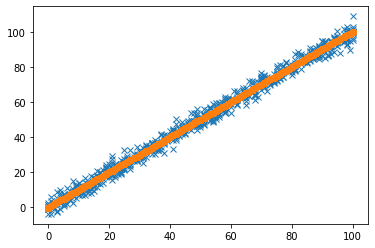

Iteration = 85, Loss = 3.9348610657602987


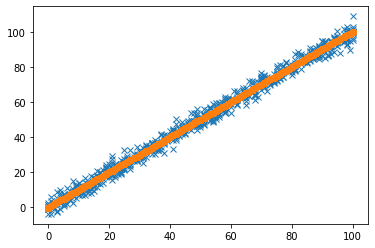

Iteration = 86, Loss = 3.9348247056436736


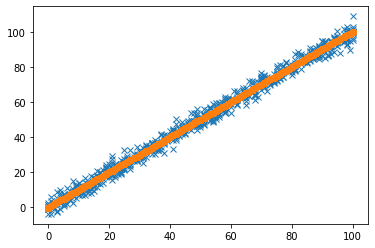

Iteration = 87, Loss = 3.9347949597001475


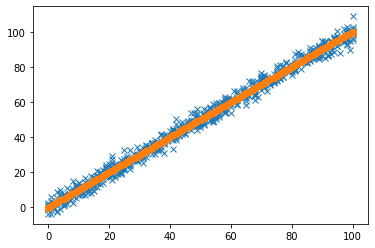

Iteration = 88, Loss = 3.934770624390224


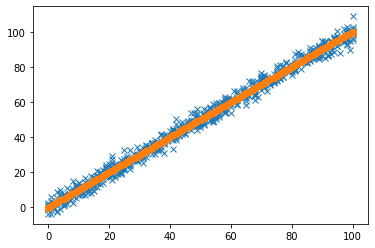

Iteration = 89, Loss = 3.934750715174928


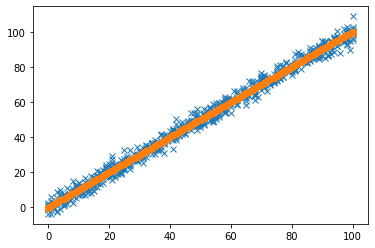

Iteration = 90, Loss = 3.934734426665656


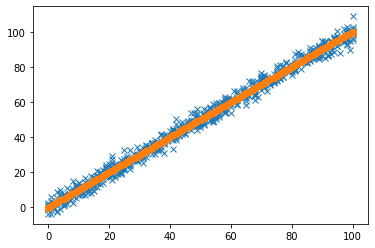

Iteration = 91, Loss = 3.93472110002531


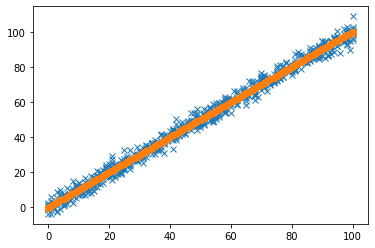

Iteration = 92, Loss = 3.934710196301238


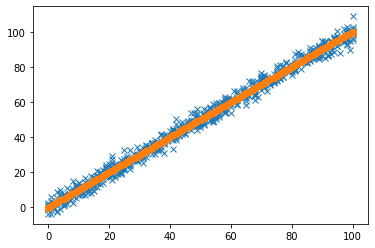

Iteration = 93, Loss = 3.9347012746106174


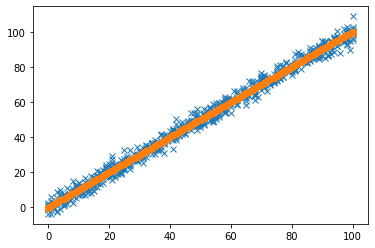

Iteration = 94, Loss = 3.934693974295303


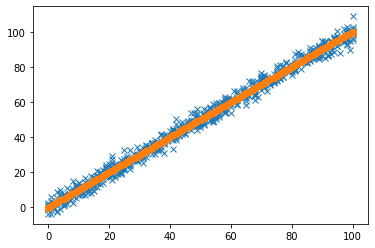

Iteration = 95, Loss = 3.934688000323844


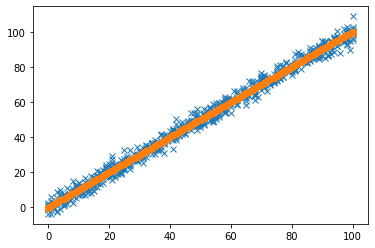

Iteration = 96, Loss = 3.9346831113498135


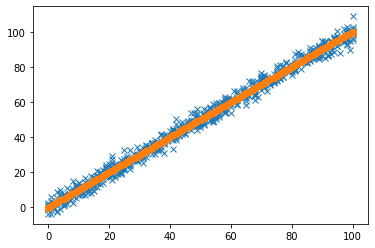

Iteration = 97, Loss = 3.9346791099430756


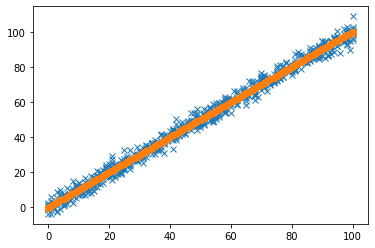

Iteration = 98, Loss = 3.9346758345986146


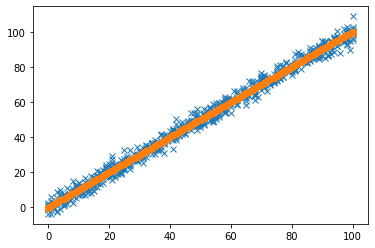

Iteration = 99, Loss = 3.9346731531994683


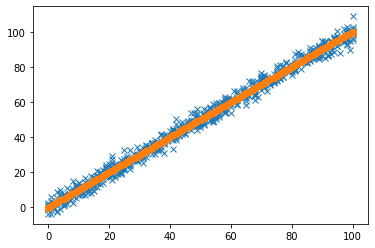

Iteration = 100, Loss = 3.9346709576691694


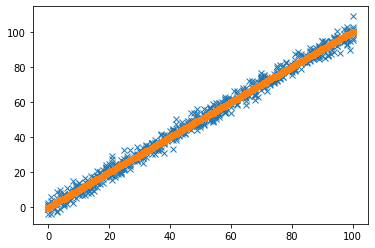

({'b1': 1.00177231148789, 'b0': -0.18638160780080829},
 [4246.3224482969235,
  3474.3617956616827,
  2842.869973141424,
  2326.286750215587,
  1903.702930929281,
  1558.0140343534981,
  1275.2279744949767,
  1043.8987173433652,
  854.6629917874628,
  699.861302335422,
  573.2279037692638,
  469.6371891637787,
  384.8962260843115,
  315.5750436692411,
  258.8678013058438,
  212.47921956999784,
  174.53167661429612,
  143.4892096427441,
  118.09534535964758,
  97.32224302113637,
  80.32909160609236,
  66.42807719251498,
  55.056543036598804,
  45.75421550731765,
  38.14457407461394,
  31.919611283794374,
  26.827365861639276,
  22.66172434486988,
  19.254078442212517,
  16.466500453874907,
  14.186160517065106,
  12.320759710269826,
  10.794794166855532,
  9.54649898444698,
  8.52534823191609,
  7.690009864392973,
  7.006672769544183,
  6.447678230729207,
  5.990400414208751,
  5.61633056706226,
  5.3103278578568585,
  5.060006537133232,
  4.855234612447751,
  4.6877237463674595,
  4.550

In [193]:
train(x_train, y_train, 0.01, iters = 100)

### Print your final fitted model/ validate model on test data set

Iteration = 1, Loss = 3082.0059878498555


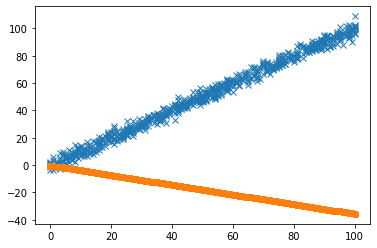

Iteration = 2, Loss = 2521.9096208698647


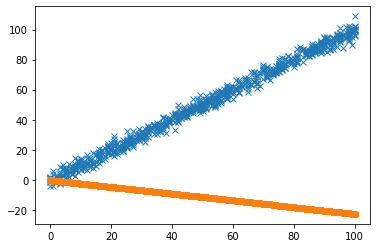

Iteration = 3, Loss = 2063.7304709681994


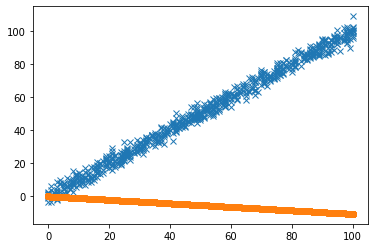

Iteration = 4, Loss = 1688.9233024480586


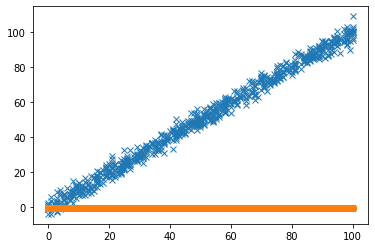

Iteration = 5, Loss = 1382.3174396419424


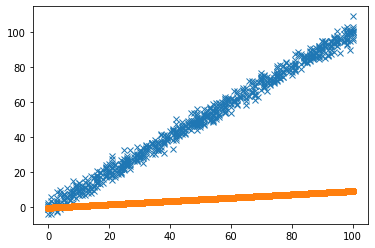

Iteration = 6, Loss = 1131.5027194237896


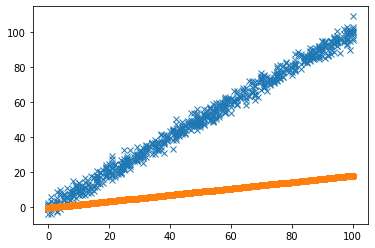

Iteration = 7, Loss = 926.3271780847375


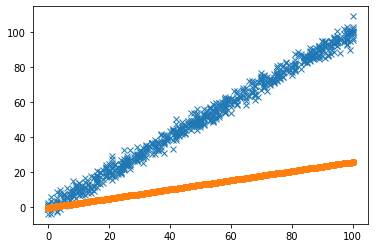

Iteration = 8, Loss = 758.4861409723088


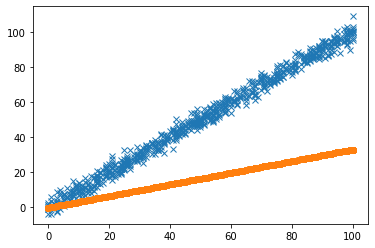

Iteration = 9, Loss = 621.1860829064182


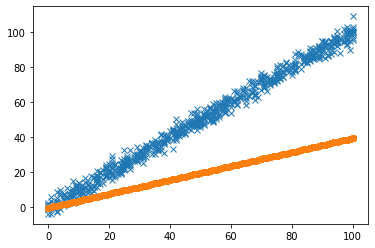

Iteration = 10, Loss = 508.86965380367576


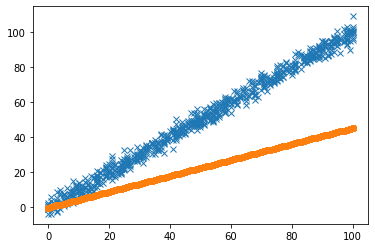

Iteration = 11, Loss = 416.9907396613133


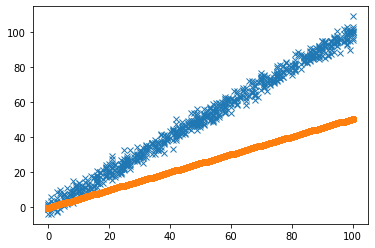

Iteration = 12, Loss = 341.83045428068357


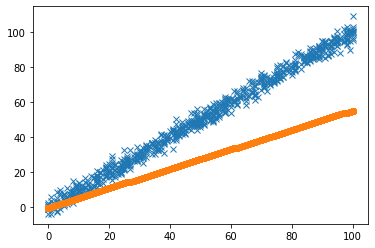

Iteration = 13, Loss = 280.34661382080384


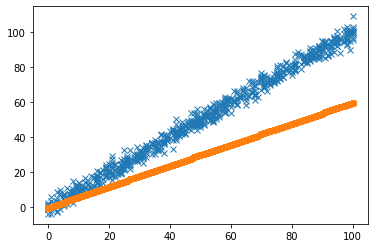

Iteration = 14, Loss = 230.05060152171424


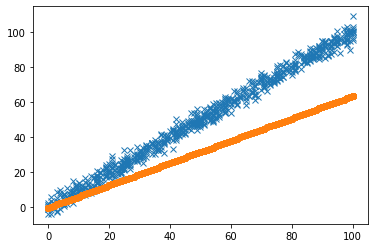

Iteration = 15, Loss = 188.90663858052943


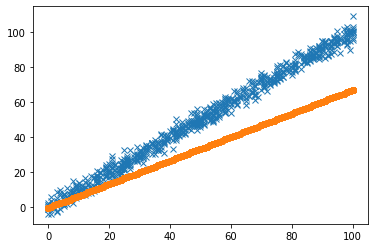

Iteration = 16, Loss = 155.2493840733441


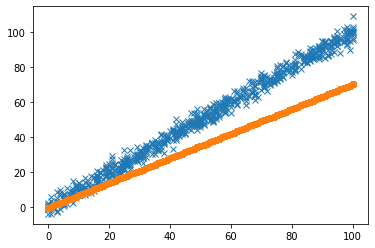

Iteration = 17, Loss = 127.71652870167135


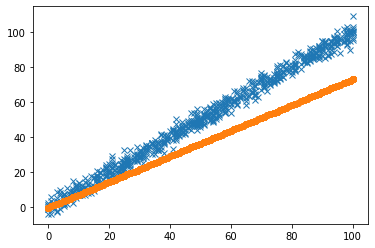

Iteration = 18, Loss = 105.19365403136112


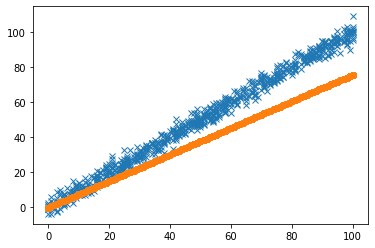

Iteration = 19, Loss = 86.7691253493919


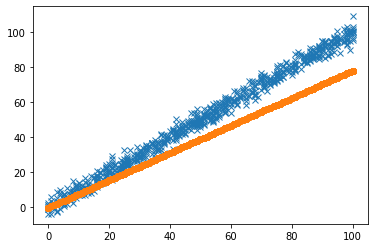

Iteration = 20, Loss = 71.69719238412526


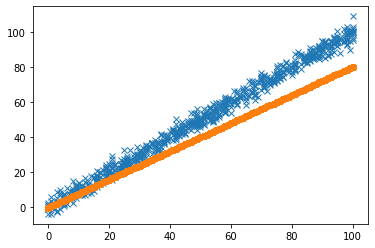

Iteration = 21, Loss = 59.367804355676405


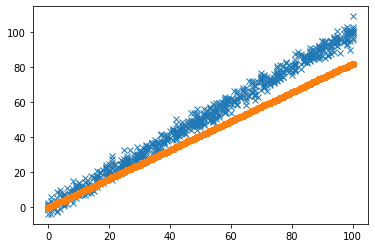

Iteration = 22, Loss = 49.28191759193223


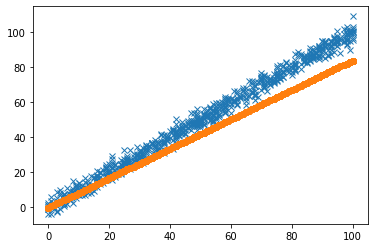

Iteration = 23, Loss = 41.0312962625518


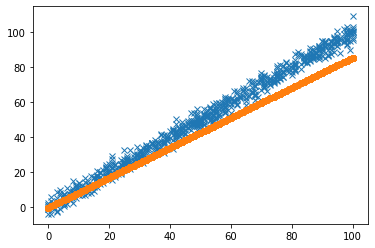

Iteration = 24, Loss = 34.28198864649984


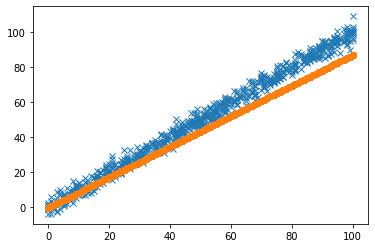

Iteration = 25, Loss = 28.76081011936592


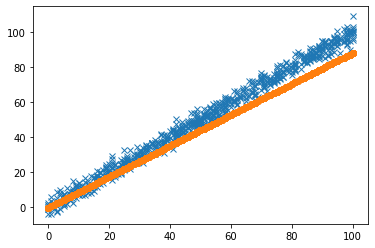

Iteration = 26, Loss = 24.24428574656116


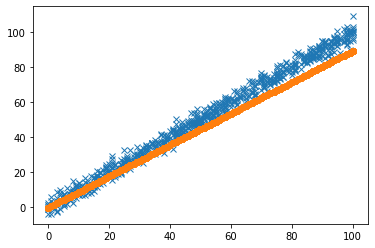

Iteration = 27, Loss = 20.54960492336253


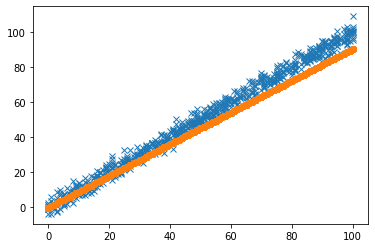

Iteration = 28, Loss = 17.527221942280747


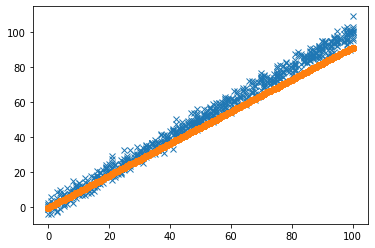

Iteration = 29, Loss = 15.054802988697354


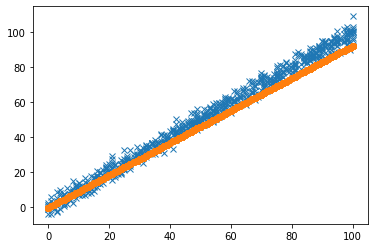

Iteration = 30, Loss = 13.032274563677861


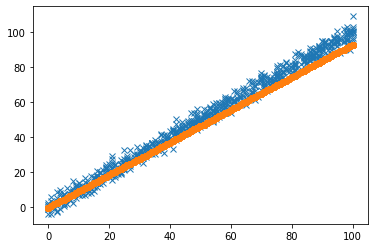

Iteration = 31, Loss = 11.377772914177102


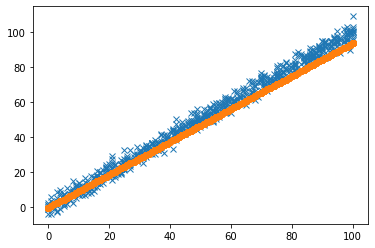

Iteration = 32, Loss = 10.024330519982412


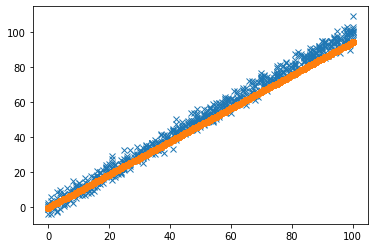

Iteration = 33, Loss = 8.917165519810855


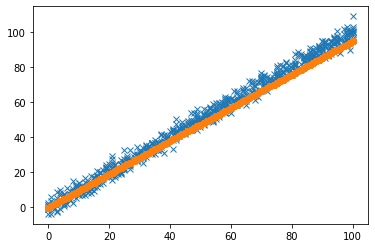

Iteration = 34, Loss = 8.011464363510056


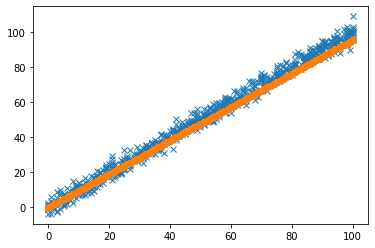

Iteration = 35, Loss = 7.27056794110771


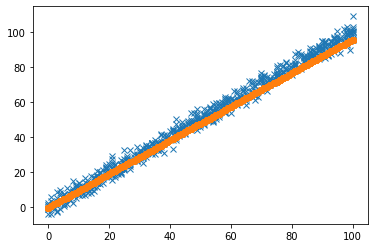

Iteration = 36, Loss = 6.664487770562322


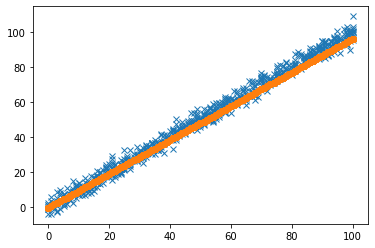

Iteration = 37, Loss = 6.168692185506838


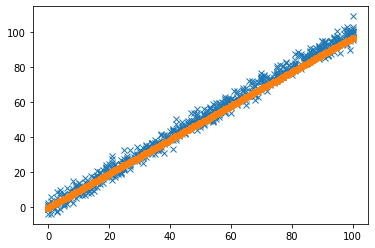

Iteration = 38, Loss = 5.763113392782811


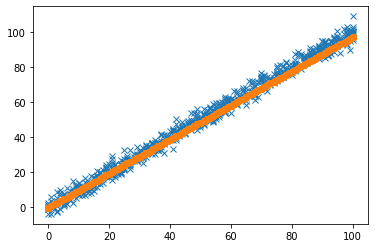

Iteration = 39, Loss = 5.431335209476955


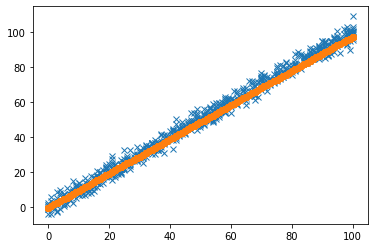

Iteration = 40, Loss = 5.159928602345996


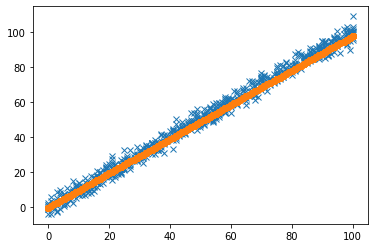

Iteration = 41, Loss = 4.93790813495806


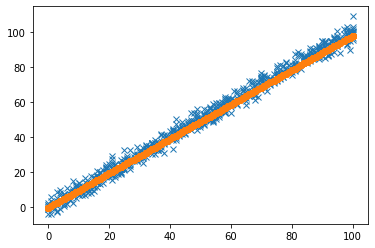

Iteration = 42, Loss = 4.756287321732763


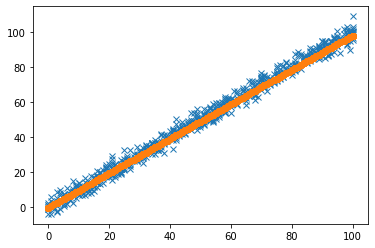

Iteration = 43, Loss = 4.607714891413197


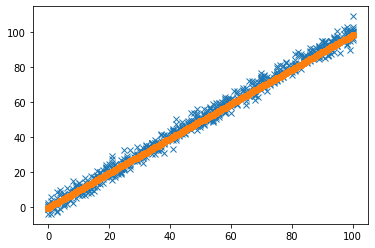

Iteration = 44, Loss = 4.4861772373886915


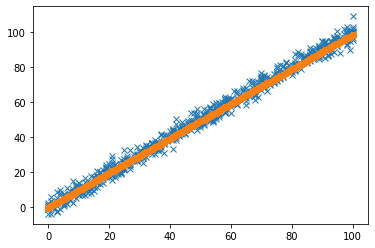

Iteration = 45, Loss = 4.386755011263043


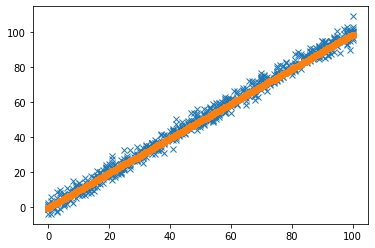

Iteration = 46, Loss = 4.305424007561909


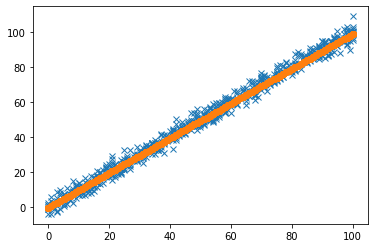

Iteration = 47, Loss = 4.238892280199032


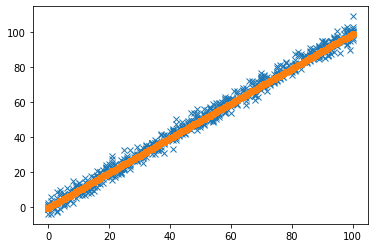

Iteration = 48, Loss = 4.184466897835812


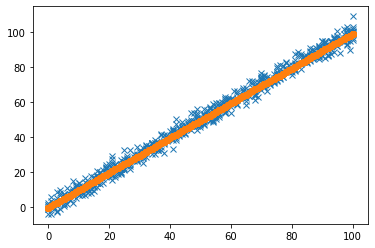

Iteration = 49, Loss = 4.1399449449310035


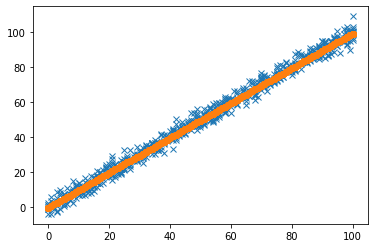

Iteration = 50, Loss = 4.103524356644573


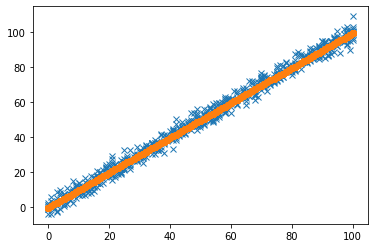

Iteration = 51, Loss = 4.073730978553964


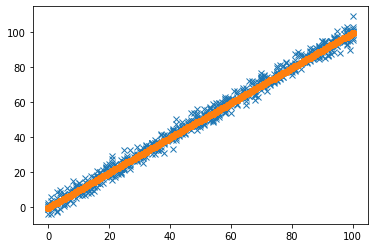

Iteration = 52, Loss = 4.049358898855513


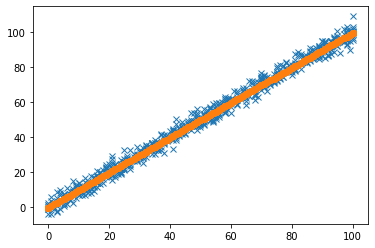

Iteration = 53, Loss = 4.029421637940332


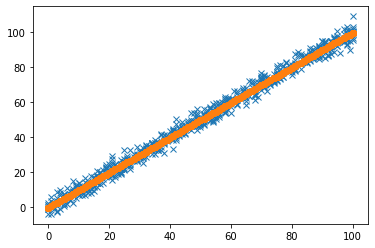

Iteration = 54, Loss = 4.013112219696399


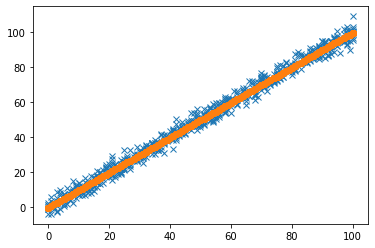

Iteration = 55, Loss = 3.999770508384975


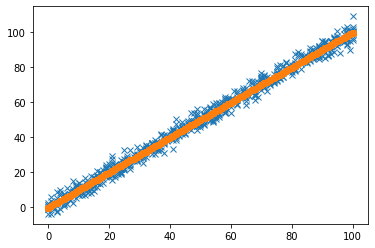

Iteration = 56, Loss = 3.9888564890203875


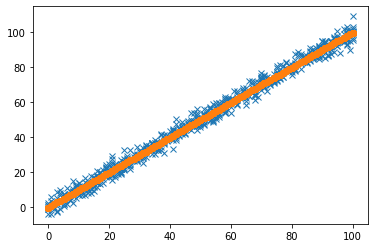

Iteration = 57, Loss = 3.9799284097512677


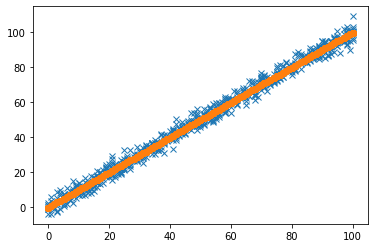

Iteration = 58, Loss = 3.9726249015353363


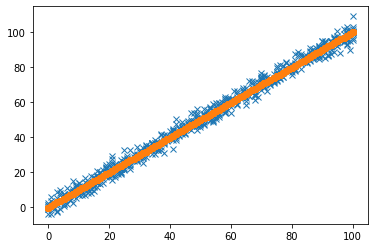

Iteration = 59, Loss = 3.9666503513846343


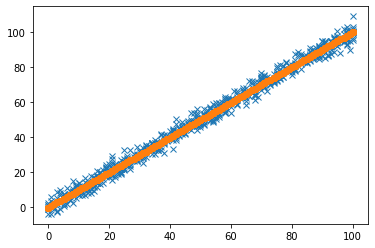

Iteration = 60, Loss = 3.9617629371494303


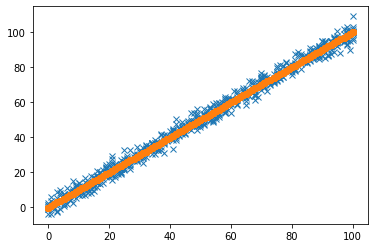

Iteration = 61, Loss = 3.9577648395373375


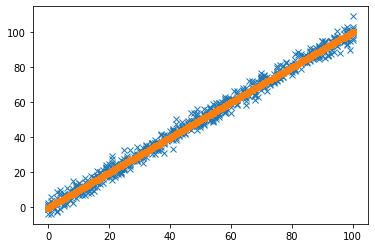

Iteration = 62, Loss = 3.954494235189801


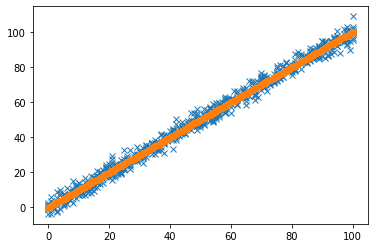

Iteration = 63, Loss = 3.951818746728164


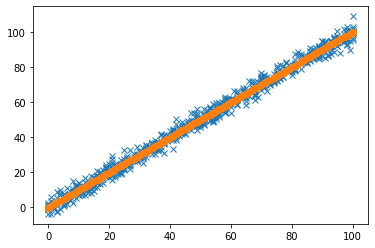

Iteration = 64, Loss = 3.9496300846537116


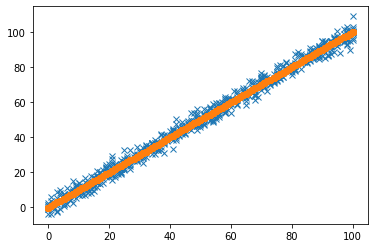

Iteration = 65, Loss = 3.9478396642274727


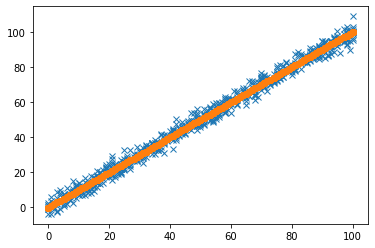

Iteration = 66, Loss = 3.9463750199188983


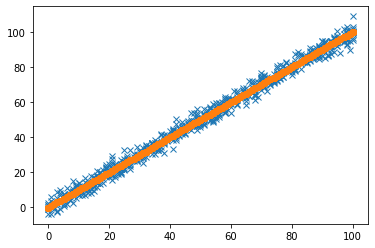

Iteration = 67, Loss = 3.9451768722947653


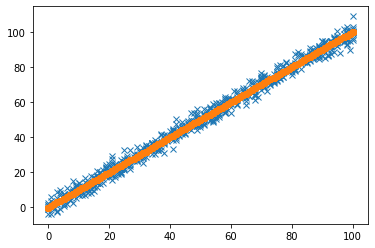

Iteration = 68, Loss = 3.944196728627896


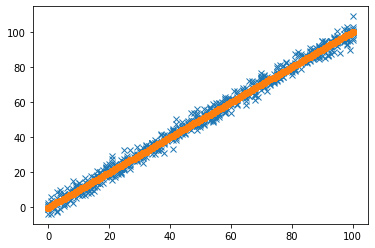

Iteration = 69, Loss = 3.943394920108017


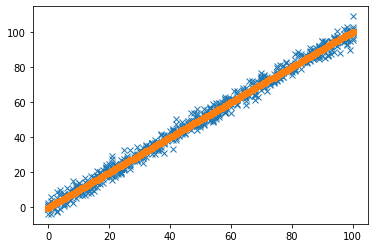

Iteration = 70, Loss = 3.9427389962090413


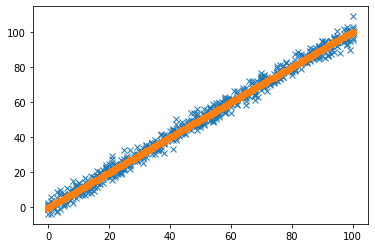

Iteration = 71, Loss = 3.942202411223246


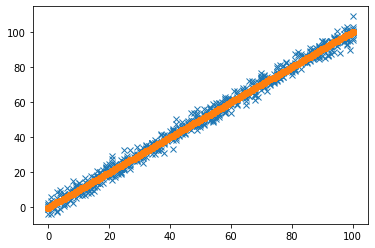

Iteration = 72, Loss = 3.9417634497985676


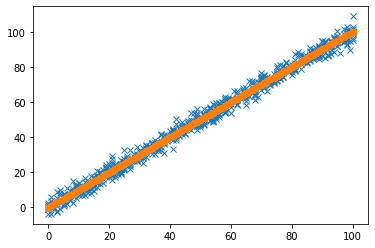

Iteration = 73, Loss = 3.9414043479891316


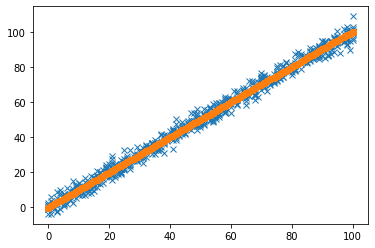

Iteration = 74, Loss = 3.9411105742426904


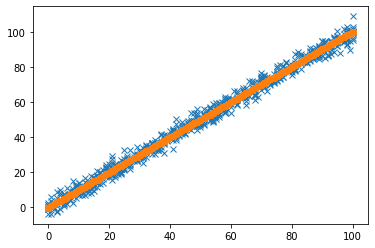

Iteration = 75, Loss = 3.9408702412222683


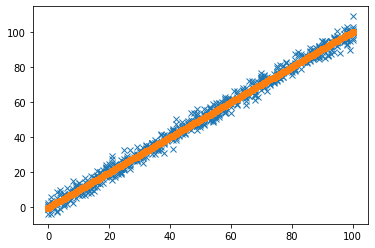

Iteration = 76, Loss = 3.940673624654913


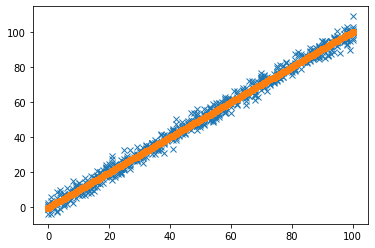

Iteration = 77, Loss = 3.9405127697325284


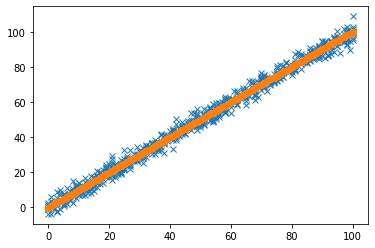

Iteration = 78, Loss = 3.940381169133477


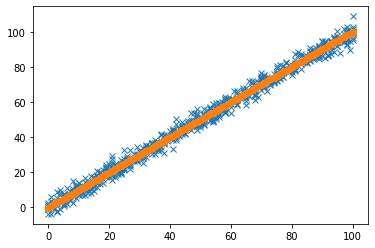

Iteration = 79, Loss = 3.9402734996325512


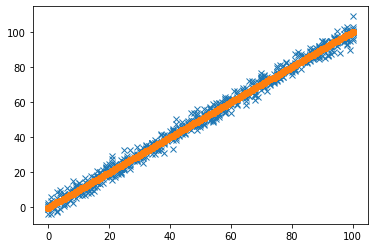

Iteration = 80, Loss = 3.940185406638394


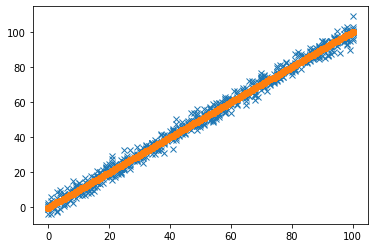

Iteration = 81, Loss = 3.9401133279372784


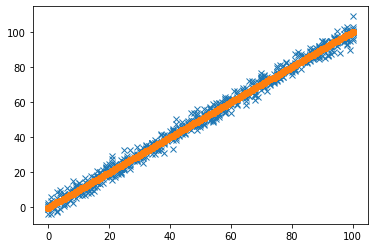

Iteration = 82, Loss = 3.9400543495091327


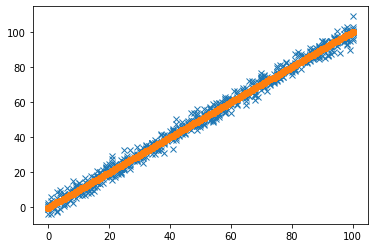

Iteration = 83, Loss = 3.9400060875798073


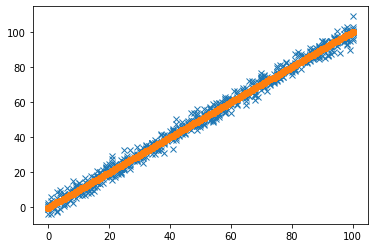

Iteration = 84, Loss = 3.939966592135561


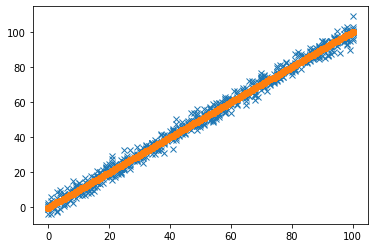

Iteration = 85, Loss = 3.9399342679944


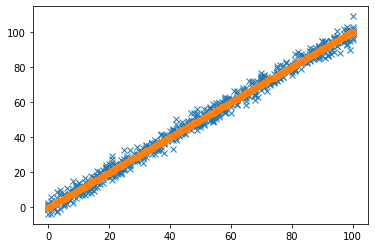

Iteration = 86, Loss = 3.939907810239576


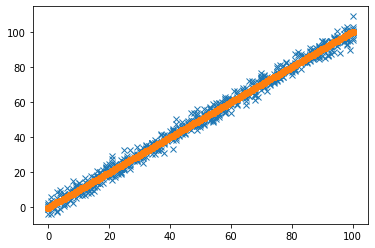

Iteration = 87, Loss = 3.939886151401847


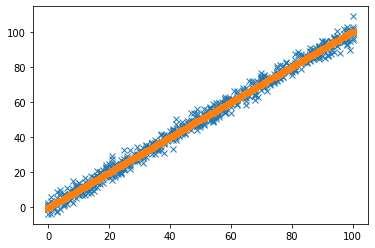

Iteration = 88, Loss = 3.9398684182526362


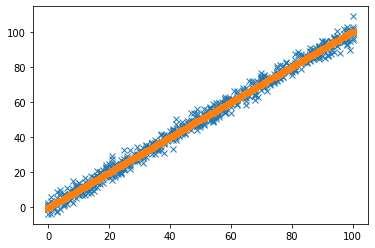

Iteration = 89, Loss = 3.9398538964592906


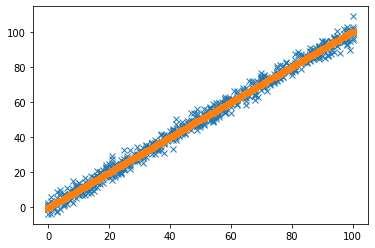

Iteration = 90, Loss = 3.9398420016717823


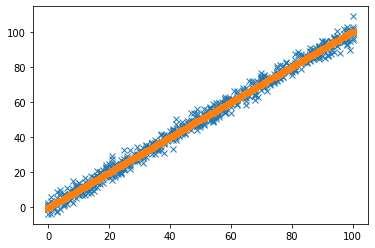

Iteration = 91, Loss = 3.9398322558705803


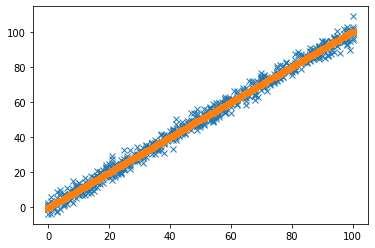

Iteration = 92, Loss = 3.9398242680183704


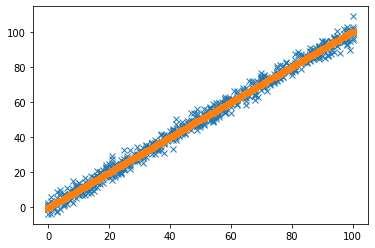

Iteration = 93, Loss = 3.939817718232443


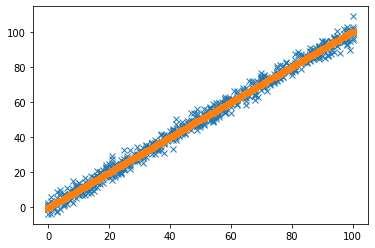

Iteration = 94, Loss = 3.9398123448371285


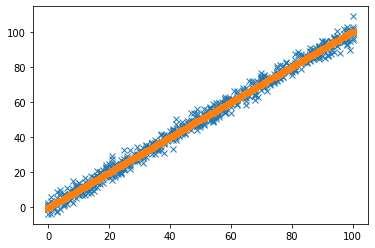

Iteration = 95, Loss = 3.939807933772241


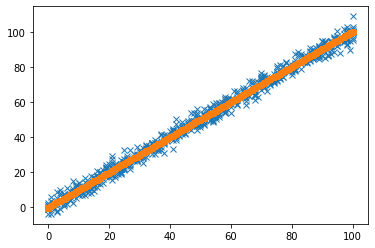

Iteration = 96, Loss = 3.939804309928781


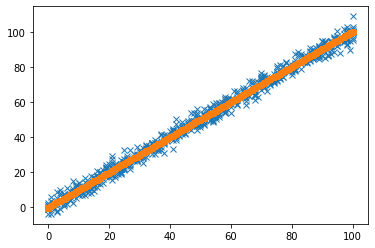

Iteration = 97, Loss = 3.9398013300612322


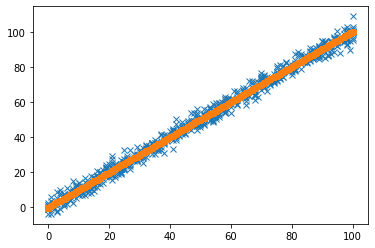

Iteration = 98, Loss = 3.939798876989563


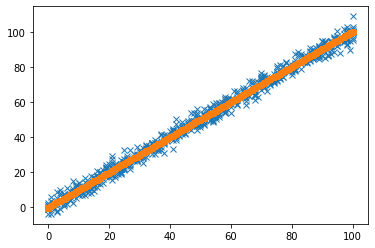

Iteration = 99, Loss = 3.9397968548562607


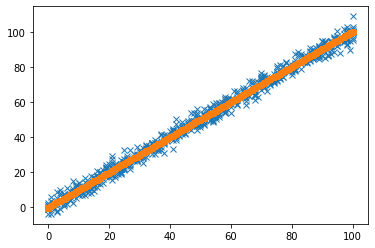

Iteration = 100, Loss = 3.939795185246399


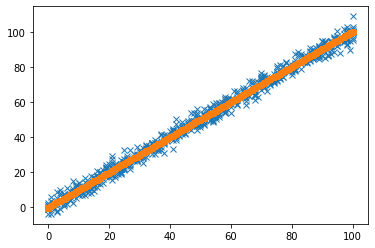

In [194]:
parameters, loss=train(x_train, y_train, 0.01, iters = 100)

In [195]:
parameters

{'b1': 1.003850475407749, 'b0': -0.32440834024394977}

In [196]:
loss

[3082.0059878498555,
 2521.9096208698647,
 2063.7304709681994,
 1688.9233024480586,
 1382.3174396419424,
 1131.5027194237896,
 926.3271780847375,
 758.4861409723088,
 621.1860829064182,
 508.86965380367576,
 416.9907396613133,
 341.83045428068357,
 280.34661382080384,
 230.05060152171424,
 188.90663858052943,
 155.2493840733441,
 127.71652870167135,
 105.19365403136112,
 86.7691253493919,
 71.69719238412526,
 59.367804355676405,
 49.28191759193223,
 41.0312962625518,
 34.28198864649984,
 28.76081011936592,
 24.24428574656116,
 20.54960492336253,
 17.527221942280747,
 15.054802988697354,
 13.032274563677861,
 11.377772914177102,
 10.024330519982412,
 8.917165519810855,
 8.011464363510056,
 7.27056794110771,
 6.664487770562322,
 6.168692185506838,
 5.763113392782811,
 5.431335209476955,
 5.159928602345996,
 4.93790813495806,
 4.756287321732763,
 4.607714891413197,
 4.4861772373886915,
 4.386755011263043,
 4.305424007561909,
 4.238892280199032,
 4.184466897835812,
 4.1399449449310035,
 4.

In [197]:
print("intercept: {}".format(parameters['b0']))

intercept: -0.32440834024394977


In [198]:
print("coeffcient: {}".format(parameters['b1']))

coeffcient: 1.003850475407749


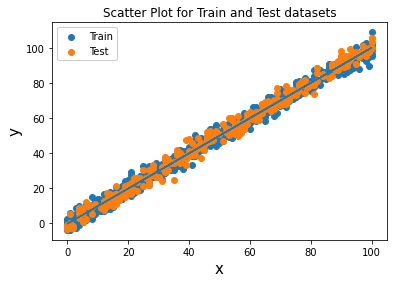

In [199]:
plt.scatter((dt1b['x']),dt1b['y'], label="Train")
plt.title("Scatter Plot for Train and Test datasets")
plt.xlabel("x", fontsize=15)
plt.ylabel("y", fontsize=15)

plt.scatter((dt1t['x']),dt1t['y'], label="Test")

plt.legend(framealpha=1, frameon=True)

plt.plot((dt1b['x']), (parameters['b0'] + parameters['b1']*(dt1b['x'])))

How about build sample residual?

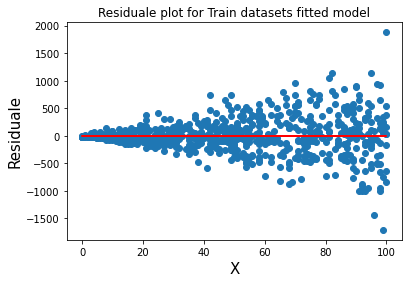

In [200]:
plt.scatter((dt1b['x']),residuale)
plt.title("Residuale plot for Train datasets fitted model")
plt.xlabel("X", fontsize=15)
plt.ylabel("Residuale", fontsize=15)
plt.plot((dt1b['x']), 0*dt1b['x'], color="r")